## Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("creditcard.csv",sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Preprocessing the Data

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df=df.fillna(method='ffill')

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df.shape

(284807, 31)

In [13]:
# Check duplicate data
df.duplicated().sum()

1081

In [14]:
# Remove duplicate data
df=df.drop_duplicates()

In [15]:
df.shape

(283726, 31)

In [16]:
# Get Fraud and Normal datasets

fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [17]:
print (fraud.shape,normal.shape)

(473, 31) (283253, 31)


In [18]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

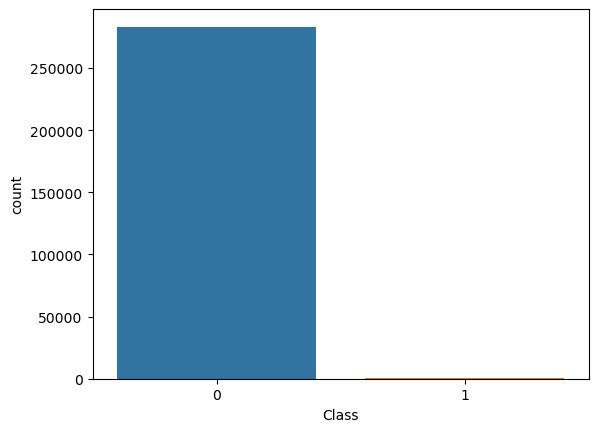

In [19]:
sns.countplot(x='Class',data=df)

<Axes: >

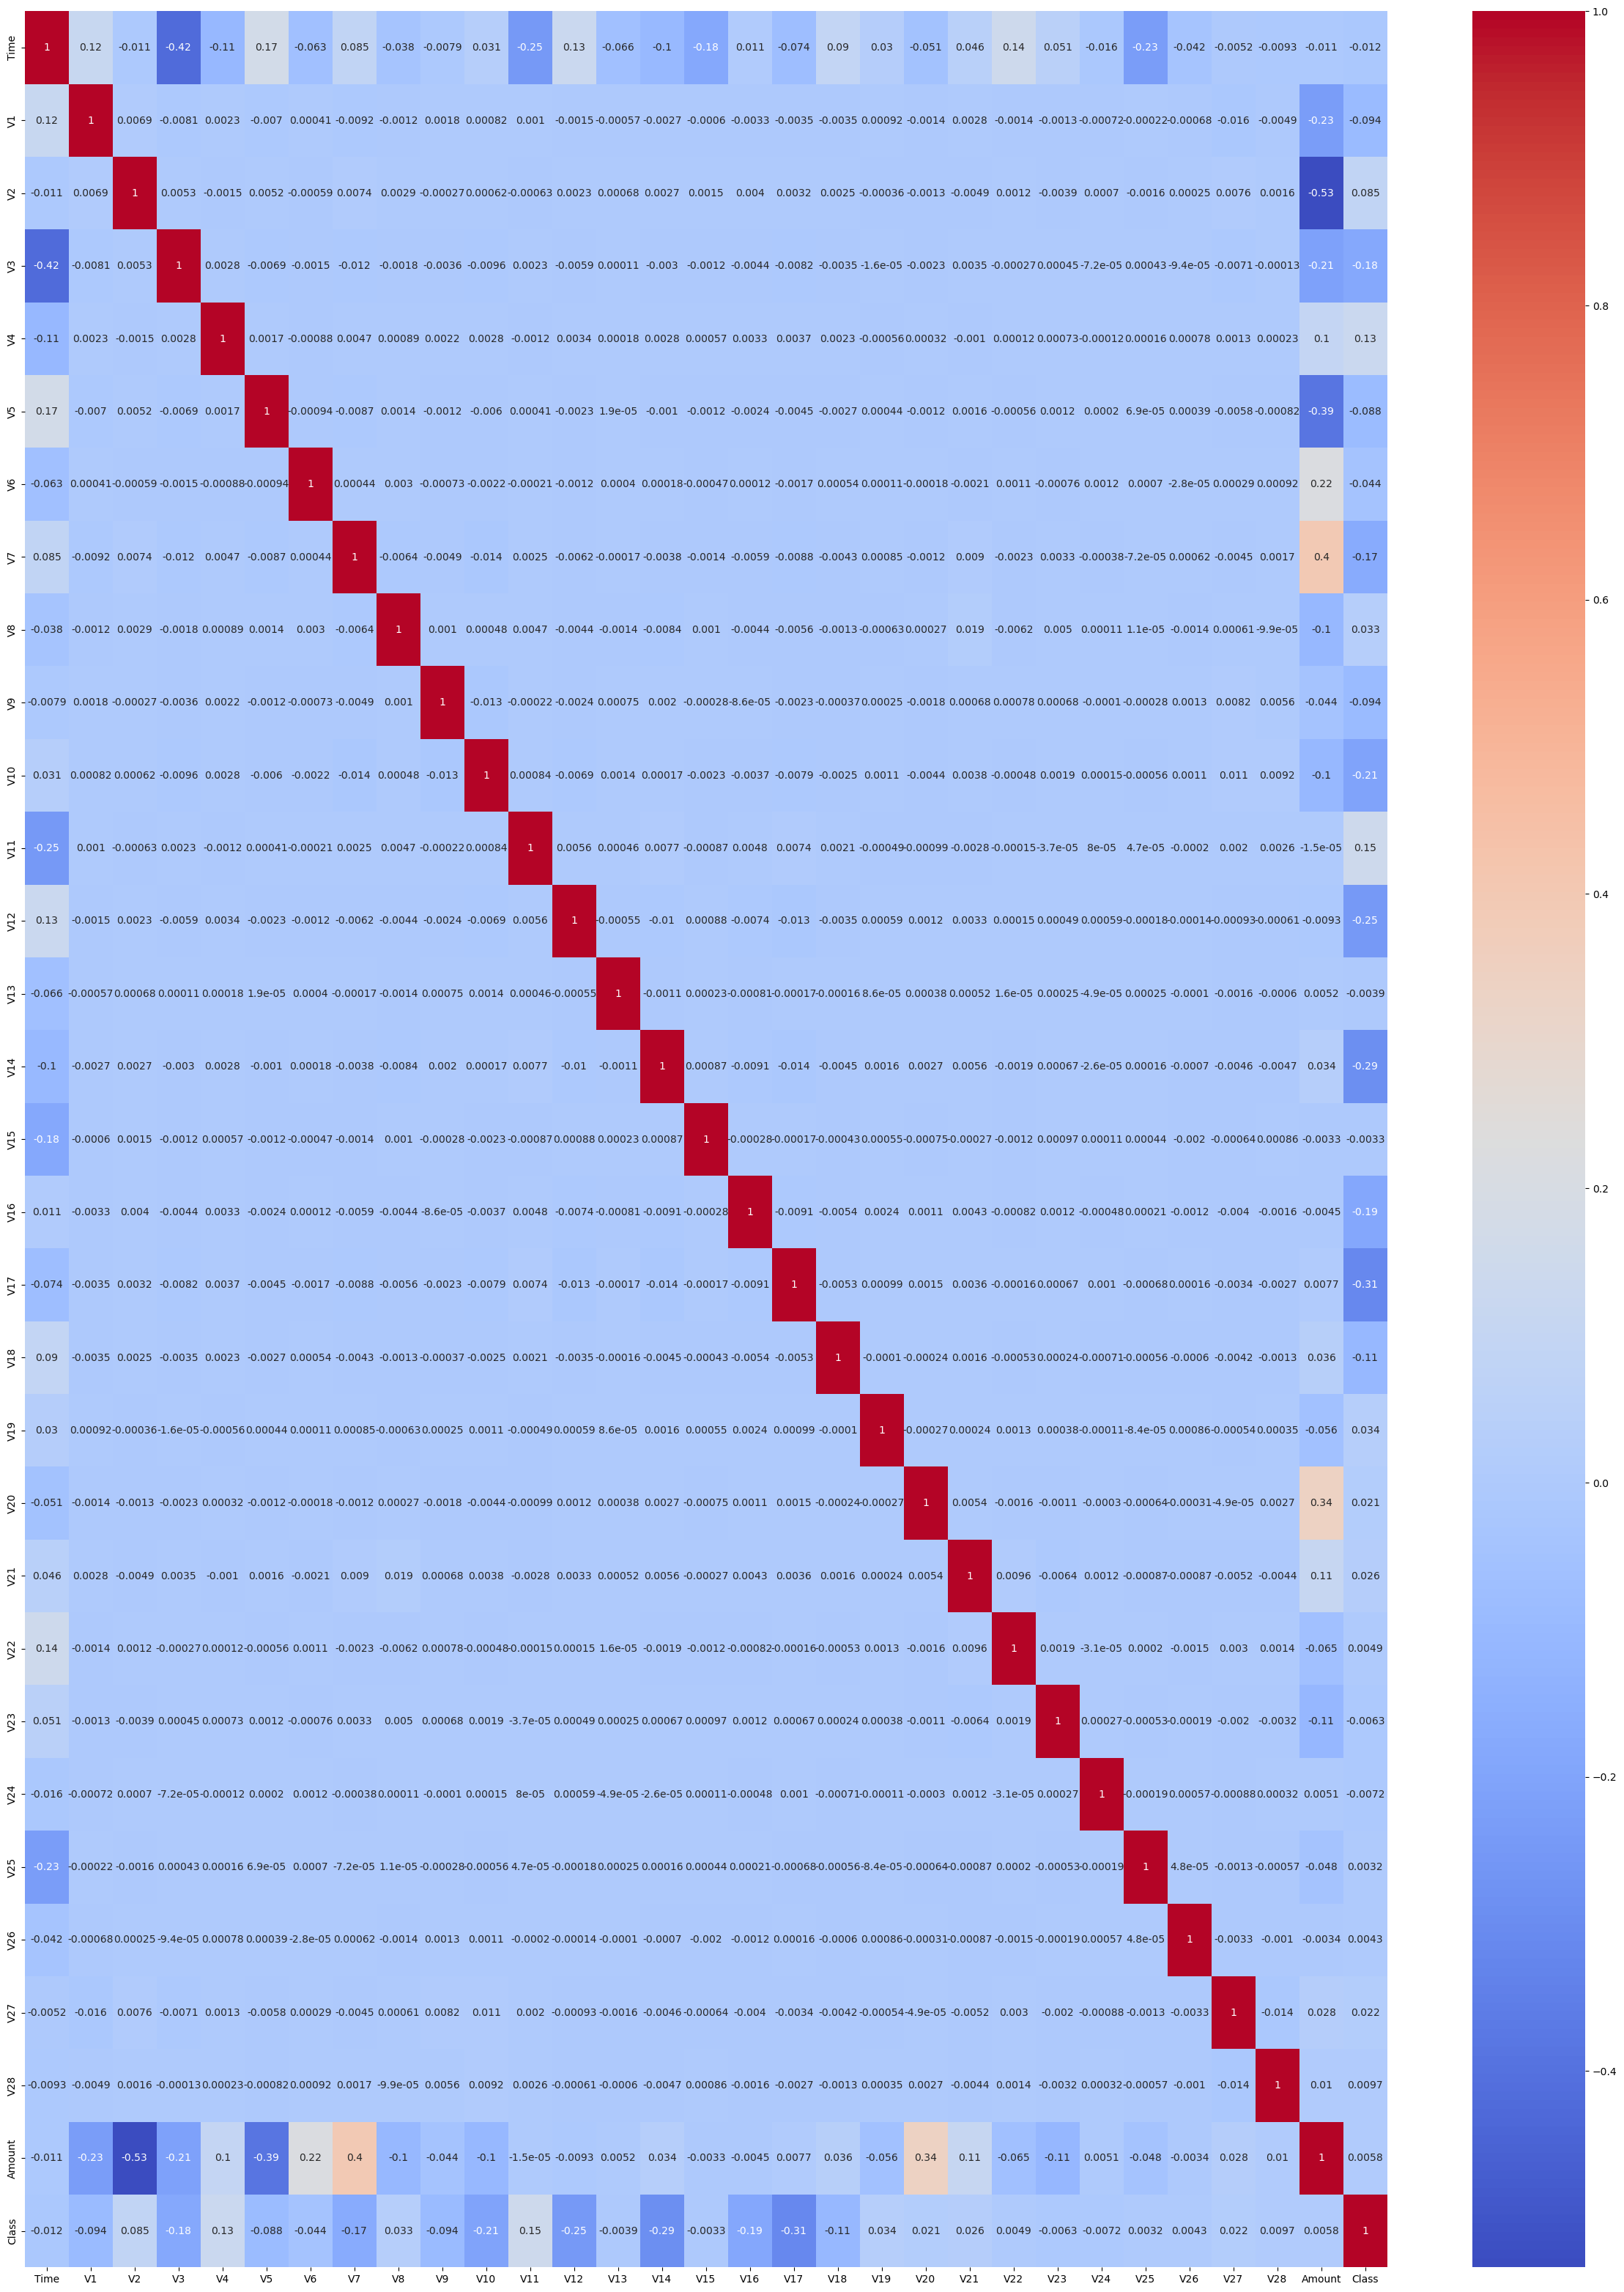

In [20]:
corr=df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [21]:
# store feature matrix in x and response in vector y
x=df.drop('Class',axis=1)
y=df['Class']

## Splitting the dataset into training and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import precision_score,f1_score,accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9991541254009093

In [29]:
precision_score(y_test,y_pred)

0.7837837837837838

In [30]:
f1_score(y_test,y_pred)

0.7073170731707318

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model_rf1=RandomForestClassifier()

In [33]:
model_rf1.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred_rf1 = model.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred_rf1)

0.9991541254009093

In [36]:
precision_score(y_test,y_pred_rf1)

0.7837837837837838

In [37]:
f1_score(y_test,y_pred_rf1)

0.7073170731707318

## Handling imbalance Dataset

In [38]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [39]:
normal.shape,fraud.shape

((283253, 31), (473, 31))

In [40]:
normal_sample=normal.sample(n=437)

In [41]:
normal_sample=normal.sample(n=437)

In [42]:
new_df=pd.concat([normal_sample,fraud],ignore_index=True)

In [43]:
new_df['Class'].value_counts()

1    473
0    437
Name: Class, dtype: int64

In [44]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,137137.0,-1.960752,2.595283,-1.894546,-1.305247,0.340628,-1.940301,1.216485,0.148348,0.457781,...,0.105020,0.848798,-0.129529,0.093074,0.039858,0.086366,0.609433,0.306334,-0.322724,0
1,127137.0,1.995335,-1.833071,-0.957935,-1.677120,-0.764308,1.122378,-1.438954,0.307198,-1.063506,...,-0.017052,0.372873,0.302814,-0.362710,-0.514243,-0.117717,0.059454,-0.035006,0.042581,0
2,115471.0,2.010998,-0.547106,-1.489380,-0.689886,0.160728,-0.161830,-0.099957,-0.119661,0.854016,...,0.099193,0.504956,-0.006171,0.417985,0.096763,0.967873,-0.097136,-0.073743,-0.183910,0
3,35855.0,-1.492585,0.477345,1.682006,-0.263090,0.690250,-1.371461,0.521708,-0.126979,-0.348931,...,-0.214235,-0.869928,-0.080026,0.315232,0.217117,-0.007668,-0.366372,0.298163,-0.342475,0
4,29047.0,-2.391967,-2.647361,0.123616,2.158132,-1.257347,1.122706,2.629590,-0.024240,-0.294778,...,0.616340,0.359465,2.104740,-0.355363,0.375758,-0.173402,0.047614,0.212974,3.189075,0


In [45]:
x=new_df.drop('Class',axis=1)
y=new_df['Class']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

## logistic regression and understading

In [47]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [48]:
# Training the Logistic Regression model with training data
model1.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = model1.predict(x_test)

In [50]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.9285714285714286

In [52]:
precision_score(y_test,y_pred)

0.9404761904761905

In [53]:
recall_score(y_test,y_pred)

0.9080459770114943

In [54]:
f1_score(y_test,y_pred)

0.9239766081871346

## Random Forest Classifier after undersampling

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_rf=RandomForestClassifier()

In [57]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rf=model_rf.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_rf)

0.9395604395604396

In [60]:
precision_score(y_test,y_pred_rf)

0.9523809523809523

In [61]:
recall_score(y_test,y_pred_rf)

0.9195402298850575

In [62]:
f1_score(y_test,y_pred_rf)

0.935672514619883

In [63]:
final_result=pd.DataFrame({'Models':['Log.R','Rand.Fr'],
                           "Accuracy":[accuracy_score(y_test,y_pred)*100,
                                 accuracy_score(y_test,y_pred_rf)*100]})

In [64]:
final_result

,Models,Accuracy
0,Log.R,92.857143
1,Rand.Fr,93.956044


<Axes: xlabel='Models', ylabel='Accuracy'>

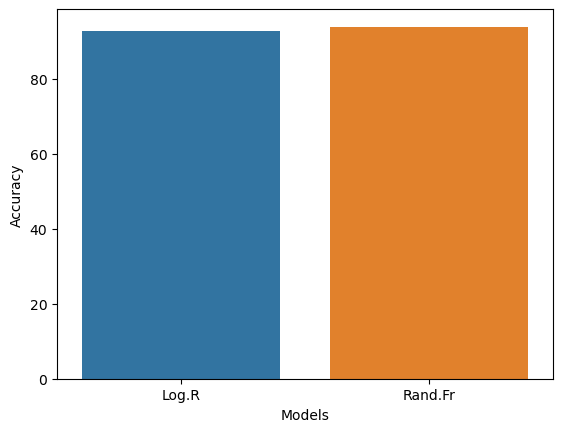

In [65]:
sns.barplot(x='Models', y='Accuracy', data=final_result)

## handling imbalance data

In [66]:
x=df.drop('Class',axis=1)
y=df['Class']

In [67]:
x.shape,y.shape

((283726, 30), (283726,))

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [70]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

In [72]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred = model1.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9991541254009093

In [75]:
precision_score(y_test,y_pred)

0.7837837837837838

In [76]:
recall_score(y_test,y_pred)

0.6444444444444445

In [77]:
f1_score(y_test,y_pred)

0.7073170731707318

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rf=model_rf.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred_rf)

0.9995065731505305

In [82]:
precision_score(y_test,y_pred_rf)

0.9696969696969697

In [83]:
recall_score(y_test,y_pred_rf)

0.7111111111111111

In [84]:
f1_score(y_test,y_pred_rf)

0.8205128205128205

In [85]:
final_result=pd.DataFrame({'Models':['Log.R','Rand.Fr'],"Accuracy":[accuracy_score(y_test,y_pred)*100,
accuracy_score(y_test,y_pred_rf)*100]})

In [86]:
final_result

,Models,Accuracy
0,Log.R,99.915413
1,Rand.Fr,99.950657


<Axes: xlabel='Models', ylabel='Accuracy'>

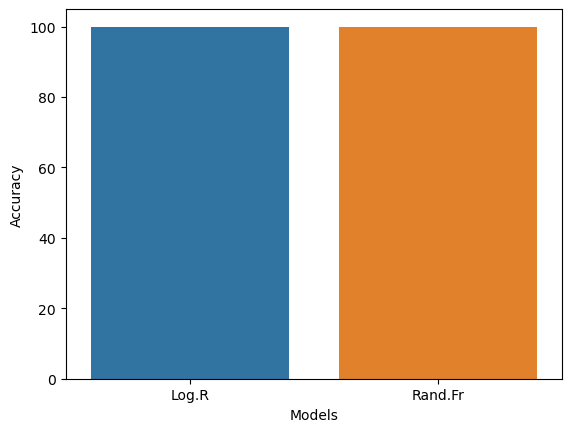

In [87]:
sns.barplot(x='Models', y='Accuracy', data=final_result)